## Train ERFNet

### Tensorboard

In [ ]:
#NOTE: after 30 epochs network tend to overfit according to https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=8063438
import os
folder_path = ROOT_DIR
os.chdir(folder_path)

%load_ext tensorboard
%tensorboard --logdir "{folder_path}/runs/erfnet"

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 47035), started 8:27:45 ago. (Use '!kill 47035' to kill it.)

<IPython.core.display.Javascript object>

### Train curves (tensorboard)

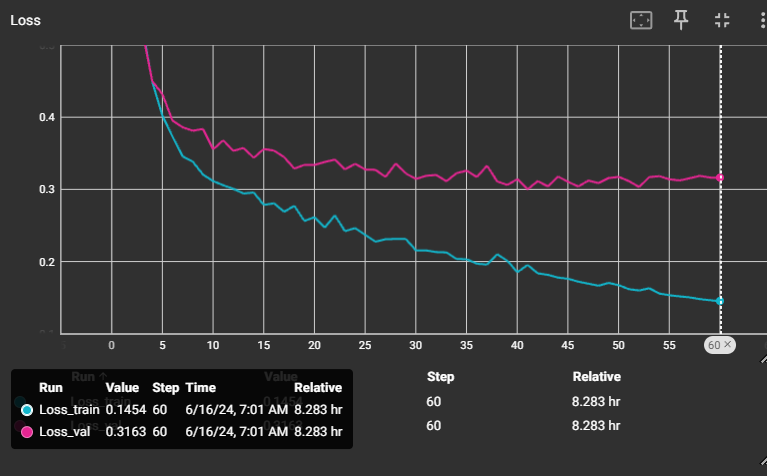

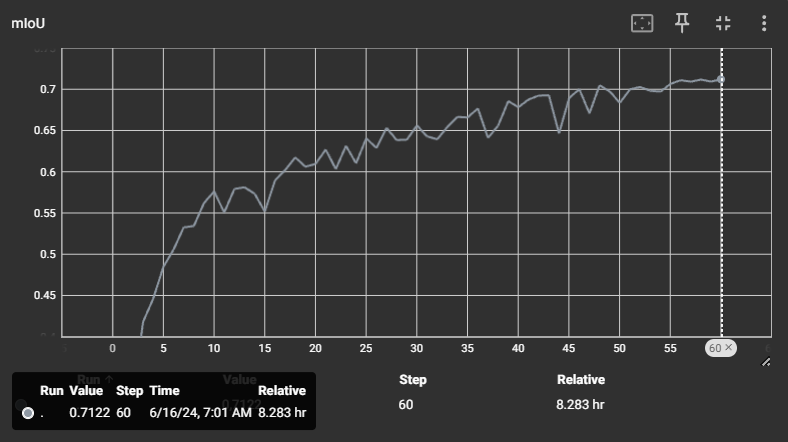

In [ ]:
#NOTE: after 30 epochs network tend to overfit according to https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=8063438
import os
folder_path = ROOT_DIR + "/train"
os.chdir(folder_path)

#9.4 GB GRAM @ batch-size = 8

%run train/main.py --savedir erfnet_train_cityscape_void \
 --datadir '{ROOT_DIR}/datasets/Train_Dataset' \
 --decoder --pretrainedEncoder '{ROOT_DIR}/trained_models/erfnet_encoder_pretrained.pth.tar' \
 --num-epochs 60 \
 --model erfnet \
 --batch-size 8
# --resume

========== DECODER TRAINING ===========
Loading encoder pretrained in imagenet
/content/drive/MyDrive/ProjectAML/datasets/Train_Dataset/leftImg8bit/train
/content/drive/MyDrive/ProjectAML/datasets/Train_Dataset/leftImg8bit/val
<class '__main__.CrossEntropyLoss2d'>
----- TRAINING - EPOCH 1 -----
LEARNING RATE:  0.0005074937878636576


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
/usr/local/lib/python3.10/dist-packages/torch/autograd/graph.py:744: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


loss: 3.026 (epoch: 1, step: 0) // Avg time/img: 0.2204 s
loss: 2.54 (epoch: 1, step: 50) // Avg time/img: 0.1415 s
loss: 2.167 (epoch: 1, step: 100) // Avg time/img: 0.1424 s
loss: 1.886 (epoch: 1, step: 150) // Avg time/img: 0.1433 s
loss: 1.68 (epoch: 1, step: 200) // Avg time/img: 0.1442 s
loss: 1.539 (epoch: 1, step: 250) // Avg time/img: 0.1449 s
loss: 1.43 (epoch: 1, step: 300) // Avg time/img: 0.1455 s
loss: 1.346 (epoch: 1, step: 350) // Avg time/img: 0.1460 s
----- VALIDATING - EPOCH 1 -----


/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:156: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)
/content/drive/MyDrive/ProjectAML/train/main.py:339: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  inputs = Variable(images, volatile=True)    #volatile flag makes it free backward or outputs for eval
/content/drive/MyDrive/ProjectAML/train/main.py:340: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  targets = Variable(labels, volatile=True)


VAL loss: 0.6354 (epoch: 1, step: 0) // Avg time/img: 0.0167 s
VAL loss: 0.8057 (epoch: 1, step: 50) // Avg time/img: 0.0060 s
VAL loss: 0.9001 (epoch: 1, step: 100) // Avg time/img: 0.0059 s
VAL loss: 0.891 (epoch: 1, step: 150) // Avg time/img: 0.0059 s
VAL loss: 0.8654 (epoch: 1, step: 200) // Avg time/img: 0.0058 s
VAL loss: 0.841 (epoch: 1, step: 250) // Avg time/img: 0.0058 s
VAL loss: 0.8358 (epoch: 1, step: 300) // Avg time/img: 0.0058 s
VAL loss: 0.8322 (epoch: 1, step: 350) // Avg time/img: 0.0058 s
VAL loss: 0.8126 (epoch: 1, step: 400) // Avg time/img: 0.0058 s
VAL loss: 0.7827 (epoch: 1, step: 450) // Avg time/img: 0.0058 s
EPOCH IoU on VAL set:  27.71 %
Saving model as best
save: ../save/erfnet_train_cityscape_void/model_best.pth (epoch: 1)
----- TRAINING - EPOCH 2 -----
LEARNING RATE:  0.0005
loss: 0.5714 (epoch: 2, step: 0) // Avg time/img: 0.1573 s
loss: 0.7466 (epoch: 2, step: 50) // Avg time/img: 0.1477 s
loss: 0.7351 (epoch: 2, step: 100) // Avg time/img: 0.1481 s
l

## 3.a) Test ERFNet

 ### **Eval IoU of ERFNet on cityscape VAL**

In [ ]:
import os
folder_path = ROOT_DIR + "/eval"
os.chdir(folder_path)

%run eval_iou.py --datadir '{ROOT_DIR}/datasets/Train_Dataset' --loadDir '{ROOT_DIR}/save/erfnet_train_cityscape_void/' --loadWeights 'model_best.pth' \
     --void --loadModel 'erfnet.py' --no-resize

%run eval_iou.py --datadir '{ROOT_DIR}/datasets/Train_Dataset' --loadDir '{ROOT_DIR}/save/erfnet_train_cityscape_void/' --loadWeights 'model_best.pth' \
     --void --loadModel 'erfnet.py'

Loading model: /content/drive/MyDrive/ProjectAML/save/erfnet_train_cityscape_void/erfnet.py
Loading weights: /content/drive/MyDrive/ProjectAML/save/erfnet_train_cityscape_void/model_best.pth
Model and weights LOADED successfully
/content/drive/MyDrive/ProjectAML/datasets/Train_Dataset/leftImg8bit/val /content/drive/MyDrive/ProjectAML/datasets/Train_Dataset/gtFine/val


  0%|          | 0/500 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
100%|██████████| 500/500 [02:54<00:00,  2.87it/s]


---------------------------------------
Took  174.47258734703064 seconds
Per-Class IoU:
73.95 Road
66.34 sidewalk
83.32 building
27.95 wall
38.03 fence
57.44 pole
45.01 traffic light
59.70 traffic sign
78.59 vegetation
50.56 terrain
67.53 sky
73.23 person
43.97 rider
85.69 car
30.99 truck
38.08 bus
22.84 train
29.01 motorcycle
65.33 bicycle
MEAN IoU:  54.61 %
Loading model: /content/drive/MyDrive/ProjectAML/save/erfnet_train_cityscape_void/erfnet.py
Loading weights: /content/drive/MyDrive/ProjectAML/save/erfnet_train_cityscape_void/model_best.pth
Model and weights LOADED successfully
/content/drive/MyDrive/ProjectAML/datasets/Train_Dataset/leftImg8bit/val /content/drive/MyDrive/ProjectAML/datasets/Train_Dataset/gtFine/val


100%|██████████| 500/500 [01:02<00:00,  8.02it/s]

---------------------------------------
Took  62.36373567581177 seconds
Per-Class IoU:
96.32 Road
79.60 sidewalk
90.30 building
46.37 wall
52.66 fence
58.04 pole
60.44 traffic light
70.75 traffic sign
90.78 vegetation
59.46 terrain
93.27 sky
74.33 person
54.11 rider
92.95 car
69.55 truck
77.93 bus
63.57 train
53.26 motorcycle
69.45 bicycle
MEAN IoU:  71.22 %


### Test on 5 anomaly detection datasets

In [ ]:
#RUN BENCHMARKS ERFNet
import os
start = os.getcwd()
folder_path = ROOT_DIR + "/eval"
os.chdir(folder_path)

datasets, formats =  ['RoadAnomaly21', 'RoadObsticle21', 'FS_LostFound_full', 'fs_static', 'RoadAnomaly'], ['png', 'webp', 'png', 'jpg', 'jpg']

DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") #'cpu' # 'cuda' or 'cpu'
print("run experiments on: "+DEVICE.type)

for resize in [False, True]:
  for anomaly_score in ['MSP']:
    for dataset,format in zip(datasets, formats):

      print(f"dataset:{dataset}, anomaly score:{anomaly_score}, device:{DEVICE}, resize to 512x1024:{resize}")

      command = f"evalAnomaly.py --input {ROOT_DIR}/datasets/Validation_Dataset/{dataset}/images/*.{format} --anomalyScore {anomaly_score} \
                --loadDir {ROOT_DIR}/save/erfnet_train_cityscape_void/ --loadWeights model_best.pth --void --modelVersion ERFNet"

      if DEVICE.type == 'cpu':
        command += ' --cpu'
      if resize:
        command += ' --resize'

      %run {command}

run experiments on: cuda
dataset:RoadAnomaly21, anomaly score:MSP, device:cuda:0, resize to 512x1024:False
Loading model: ../models/erfnet.py
Loading weights: /content/drive/MyDrive/ProjectAML/save/erfnet_train_cityscape_void/model_best.pth
Model and weights LOADED successfully


100%|██████████| 10/10 [00:04<00:00,  2.30it/s]


AUPRC score: 24.09559500980048
FPR@TPR95: 65.4603109251349
dataset:RoadObsticle21, anomaly score:MSP, device:cuda:0, resize to 512x1024:False
Loading model: ../models/erfnet.py
Loading weights: /content/drive/MyDrive/ProjectAML/save/erfnet_train_cityscape_void/model_best.pth
Model and weights LOADED successfully


100%|██████████| 30/30 [00:23<00:00,  1.26it/s]


AUPRC score: 0.4834450182013911
FPR@TPR95: 97.52027748104408
dataset:FS_LostFound_full, anomaly score:MSP, device:cuda:0, resize to 512x1024:False
Loading model: ../models/erfnet.py
Loading weights: /content/drive/MyDrive/ProjectAML/save/erfnet_train_cityscape_void/model_best.pth
Model and weights LOADED successfully


100%|██████████| 100/100 [01:17<00:00,  1.30it/s]


AUPRC score: 0.8858484607134814
FPR@TPR95: 55.48433031642678
dataset:fs_static, anomaly score:MSP, device:cuda:0, resize to 512x1024:False
Loading model: ../models/erfnet.py
Loading weights: /content/drive/MyDrive/ProjectAML/save/erfnet_train_cityscape_void/model_best.pth
Model and weights LOADED successfully


100%|██████████| 30/30 [00:53<00:00,  1.79s/it]


AUPRC score: 3.240249790806745
FPR@TPR95: 81.09241356661259
dataset:RoadAnomaly, anomaly score:MSP, device:cuda:0, resize to 512x1024:False
Loading model: ../models/erfnet.py
Loading weights: /content/drive/MyDrive/ProjectAML/save/erfnet_train_cityscape_void/model_best.pth
Model and weights LOADED successfully


100%|██████████| 60/60 [01:28<00:00,  1.48s/it]


AUPRC score: 9.294209855684628
FPR@TPR95: 92.52385982656185
dataset:RoadAnomaly21, anomaly score:MSP, device:cuda:0, resize to 512x1024:True
Loading model: ../models/erfnet.py
Loading weights: /content/drive/MyDrive/ProjectAML/save/erfnet_train_cityscape_void/model_best.pth
Model and weights LOADED successfully


100%|██████████| 10/10 [00:02<00:00,  3.64it/s]


AUPRC score: 25.16469112876512
FPR@TPR95: 69.3539816009165
dataset:RoadObsticle21, anomaly score:MSP, device:cuda:0, resize to 512x1024:True
Loading model: ../models/erfnet.py
Loading weights: /content/drive/MyDrive/ProjectAML/save/erfnet_train_cityscape_void/model_best.pth
Model and weights LOADED successfully


100%|██████████| 30/30 [00:08<00:00,  3.38it/s]


AUPRC score: 0.7581179145381647
FPR@TPR95: 94.66318860212775
dataset:FS_LostFound_full, anomaly score:MSP, device:cuda:0, resize to 512x1024:True
Loading model: ../models/erfnet.py
Loading weights: /content/drive/MyDrive/ProjectAML/save/erfnet_train_cityscape_void/model_best.pth
Model and weights LOADED successfully


100%|██████████| 100/100 [00:30<00:00,  3.31it/s]


AUPRC score: 5.505661513122728
FPR@TPR95: 27.35516103872037
dataset:fs_static, anomaly score:MSP, device:cuda:0, resize to 512x1024:True
Loading model: ../models/erfnet.py
Loading weights: /content/drive/MyDrive/ProjectAML/save/erfnet_train_cityscape_void/model_best.pth
Model and weights LOADED successfully


100%|██████████| 30/30 [00:06<00:00,  4.58it/s]


AUPRC score: 15.369807587297956
FPR@TPR95: 45.654066885435526
dataset:RoadAnomaly, anomaly score:MSP, device:cuda:0, resize to 512x1024:True
Loading model: ../models/erfnet.py
Loading weights: /content/drive/MyDrive/ProjectAML/save/erfnet_train_cityscape_void/model_best.pth
Model and weights LOADED successfully


100%|██████████| 60/60 [00:13<00:00,  4.53it/s]


AUPRC score: 10.381005414252547
FPR@TPR95: 90.26590341304669
